In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [2]:
df=pd.read_csv('cancel_train.csv')
df

,mon,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,order_create_date,...,strOrderType,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
0,NY11345685302,NY,REDVENT: REDVENT,FTTP_100M_100M,BREWSTER,TECH INSTALL,COMCAST,MONTHTOMONTH,A001696,2/4/18,...,N,NO,NaN,AERIAL,SFU,N,RED VENTURES,UNKNOWN,0,NaN
1,MD11346031526,MD,CSSC: CSSC,FTTP_1000M_1000M,OWEN BROWN,TECH INSTALL,COMCAST,CONTRACT,A002775,2/5/18,...,N,NO,NaN,BURIED,SFU,N,BIG BOX,1000M + TV Mundo + FDV Unlim,0,NaN
2,PA11346211594,PA,ONLINE: ONLINE,FTTP_100M_100M,BRADDOCK,TECH INSTALL,COMCAST,MONTHTOMONTH,239B3PA,2/7/18,...,N,NO,NaN,AERIAL,SFU,N,ONLINE CON,UNKNOWN,1,NaN
3,VA11346969162,VA,CSSC: CSSC,FTTP_1000M_1000M,DRUMMONDS CORNER,TECH INSTALL,COX COMM,CONTRACT,V660449,2/9/18,...,M,NO,NaN,BURIED,SFU,N,CSSC,1000M + Extreme HD - 2014 + NO FDV,0,NaN
4,NY11345471806,NY,ONLINE: ONLINE,FTTP_1000M_1000M,LEVITTOWN,TECH INSTALL,CABLEVISION,CONTRACT,C7962VZ,2/3/18,...,N,NO,NaN,AERIAL,SFU,N,ONLINE CON,1000M + Preferred HD 2015 + FDV Unlim,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50586,NY11346543694,NY,CSSC: CSSC,FTTP_150M_150M,BROAD STREET,TECH INSTALL,TIME WARNER,CONTRACT,A003915,2/7/18,...,M,NO,NaN,MDU_INSIDE,MDU,Y,D2D CON,150M + Preferred HD 2015 + FDV Unlim,0,1.0
50587,NJ11345798633,NJ,CSSC: CSSC,FTTP_1000M_1000M,MARLTON,TECH INSTALL,COMCAST,CONTRACT,LOCKDA4,2/5/18,...,M,NO,NaN,BURIED,SFU,N,CSSC,1000M + Extreme HD - 2014 + FDV Unlim,0,NaN
50588,MD11345784978,MD,ONLINE: ONLINE,FTTP_75M_75M,BETHESDA,TECH INSTALL,COMCAST,MONTHTOMONTH,V320760,2/5/18,...,N,NO,NaN,MDU_INSIDE,MDU,N,CSSC,75M + Preferred HD 2015 + NO FDV,0,NaN
50589,VA11347258162,VA,CSSC: CSSC,FTTP_50M_50M,DULLES CORNER,SUPERCEDURE,COX COMM,CONTRACT,VISAGAL,2/10/18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50M + Preferred HD 2015 + FDV Unlim,0,1.0


In [3]:
df2=pd.read_csv('cancel_train.csv')

In [115]:
(df
 #.describe()
 .columns
)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_base_score', 'param_booster', 'param_callbacks',
       'param_colsample_bylevel', 'param_colsample_bynode',
       'param_colsample_bytree', 'param_early_stopping_rounds',
       'param_enable_categorical', 'param_eval_metric', 'param_gamma',
       'param_gpu_id', 'param_grow_policy', 'param_importance_type',
       'param_interaction_constraints', 'param_learning_rate', 'param_max_bin',
       'param_max_cat_to_onehot', 'param_max_delta_step', 'param_max_depth',
       'param_max_leaves', 'param_min_child_weight', 'param_missing',
       'param_monotone_constraints', 'param_n_estimators', 'param_n_jobs',
       'param_num_parallel_tree', 'param_objective', 'param_predictor',
       'param_random_state', 'param_reg_alpha', 'param_reg_lambda',
       'param_sampling_method', 'param_scale_pos_weight', 'param_subsample',
       'param_tree_method', 'param_use_label_encoder',
       'param_validate

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50591 entries, 0 to 50590
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mon                        50591 non-null  object 
 1   state                      50591 non-null  object 
 2   originalagency             50591 non-null  object 
 3   speed                      50591 non-null  object 
 4   wirecenter                 50583 non-null  object 
 5   InstallType                50591 non-null  object 
 6   competitorname             50535 non-null  object 
 7   ContractType               50591 non-null  object 
 8   salesrepid                 50383 non-null  object 
 9   order_create_date          50591 non-null  object 
 10  canceldate                 6170 non-null   object 
 11  endclientsystem            50412 non-null  object 
 12  hfws_ind                   2164 non-null   object 
 13  due_date                   50359 non-null  obj

In [6]:
df.describe(include='all').T  # ÇOK AZ NÜMERİK SÜTUN VAR !   ( 2 İNTEGER 2 BOOL DEĞİŞKEN !)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mon,50591,50569,NY11345355589,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,50591,11,NY,14929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
originalagency,50591,27,CSSC: CSSC,27155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speed,50591,20,FTTP_1000M_1000M,26771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wirecenter,50583,709,JOURNAL SQUARE,555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InstallType,50591,7,TECH INSTALL,45758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
competitorname,50535,8,COMCAST,25516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ContractType,50591,2,CONTRACT,27851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salesrepid,50383,4831,A001696,8288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_create_date,50591,13,2/12/18,5340,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.waitingdayofcustomers=pd.to_numeric(df.waitingdayofcustomers,errors='coerce')
df.waitingdayforcompany=pd.to_numeric(df.waitingdayforcompany,errors='coerce')
#df.notruckrollrequiredreason=pd.to_numeric(df.notruckrollrequiredreason,errors='coerce')


array([[<AxesSubplot:title={'center':'waitingdayofcustomers'}>,
        <AxesSubplot:title={'center':'waitingdayforcompany'}>]],
      dtype=object)

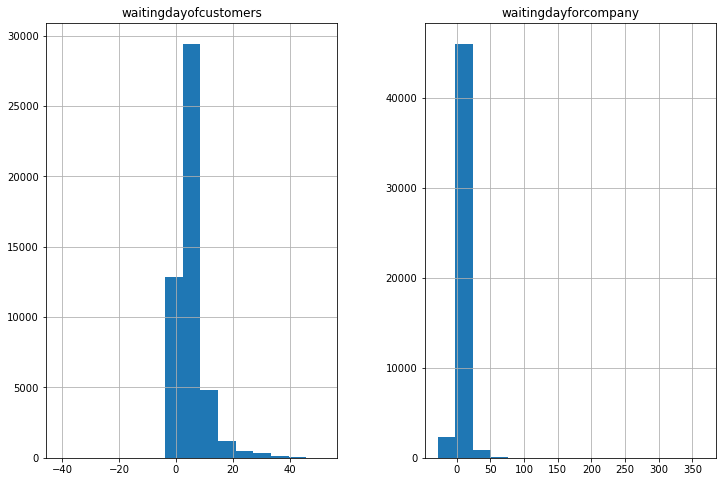

In [8]:
df.hist(column=['waitingdayofcustomers','waitingdayforcompany'], bins=15, figsize=(12,8))

### KORELASYON  !!

In [9]:
df[['waitingdayofcustomers','waitingdayforcompany']].corr()

   #  corelasyon yok !

,waitingdayofcustomers,waitingdayforcompany
waitingdayofcustomers,1.000000,0.019263
waitingdayforcompany,0.019263,1.000000


In [10]:
(df
 [['due_date','FIRSTOFFEREDDATE','waitingdayofcustomers','waitingdayforcompany']]
 #.describe()
 #.columns
 #.info()
 .tail(20)
)

#.due_date.value_counts(dropna=False)
 #.FIRSTOFFEREDDATE.str.split(pat="/")
 #.waitingdayofcustomers.isna().any()
 #.waitingdayforcompany.describe()

,due_date,FIRSTOFFEREDDATE,waitingdayofcustomers,waitingdayforcompany
50571,2/17/18,2/13/18,4.0,4.0
50572,2/8/18,2/7/18,6.0,1.0
50573,3/9/18,3/9/18,36.0,0.0
50574,2/9/18,2/8/18,0.0,1.0
50575,2/11/18,2/11/18,6.0,0.0
50576,2/15/18,2/14/18,7.0,1.0
50577,2/15/18,2/15/18,6.0,0.0
50578,2/13/18,2/13/18,5.0,0.0
50579,2/2/18,2/2/18,1.0,0.0
50580,2/9/18,2/7/18,2.0,2.0


### OUTLİAR   ANALİZİ

<AxesSubplot:>

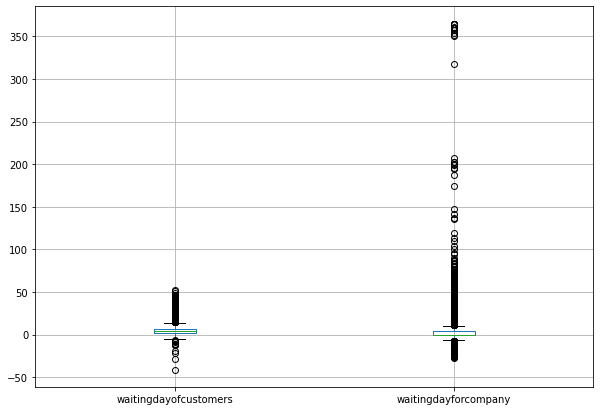

In [11]:
(df
 [['waitingdayofcustomers','waitingdayforcompany']]
 .boxplot(figsize=(10,7))
 #.describe()
 #.columns
 #.info()
 # df.boxplot(column=['Col1', 'Col2', 'Col3'])
 
)

####  INTER-QUANTİLE METHODUYLA OUTLİARLARI STANDARTLAŞTIRMA !

In [12]:
ıqr_customer=df.waitingdayofcustomers.quantile(0.75)-df.waitingdayofcustomers.quantile(0.25)
ıqr_customer

5.0

In [13]:
border_customer_high=df.waitingdayofcustomers.quantile(0.75)+(1.5*ıqr_customer)
border_customer_low=df.waitingdayofcustomers.quantile(0.25)-(1.5*ıqr_customer)
print('customer_quantile_limits   :'+str(border_customer_low)+' - '+str(border_customer_high))

customer_quantile_limits   :-5.5 - 14.5


In [14]:
ıqr_company=df.waitingdayforcompany.quantile(0.75)-df.waitingdayforcompany.quantile(0.25)
ıqr_company

4.0

In [15]:
border_company_high=df.waitingdayforcompany.quantile(0.75)+(1.5*ıqr_company)
border_company_low=df.waitingdayforcompany.quantile(0.25)-(1.5*ıqr_company)
print('customer_company_limits   :'+str(border_company_low)+' - '+str(border_company_high))

customer_company_limits   :-6.0 - 10.0


In [16]:
df.loc[df['waitingdayofcustomers']>14.5, 'waitingdayofcustomers']=15
df.loc[df['waitingdayofcustomers']<--5.5, 'waitingdayofcustomers']=-6

In [17]:
df.waitingdayofcustomers.value_counts().nlargest(50)

-6.0     31252
 6.0      4950
 7.0      4235
 15.0     2106
 8.0      1890
 9.0      1324
 10.0     1119
 11.0      742
 12.0      619
 13.0      588
 14.0      462
Name: waitingdayofcustomers, dtype: int64

In [18]:
df.loc[df['waitingdayforcompany']>10, 'waitingdayforcompany']=10
df.loc[df['waitingdayforcompany']<-6, 'waitingdayforcompany']=-6

In [20]:
df.waitingdayforcompany.value_counts().nlargest(50)

 0.0     23122
 10.0     5902
 1.0      5697
 2.0      2608
 3.0      1996
 4.0      1860
 5.0      1461
 6.0      1208
 7.0       916
 8.0       863
 9.0       736
-1.0       581
-6.0       561
-2.0       527
-3.0       481
-4.0       384
-5.0       358
Name: waitingdayforcompany, dtype: int64

In [22]:
wcm=df.waitingdayofcustomers[50590]
print(wcm)

nan


In [23]:
df[df.salesrepid.isnull()].query('cancel_ind==1.0')

,mon,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,order_create_date,...,strOrderType,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
6527,NY11345698118,NY,CSSC: CSSC,FTTP_1000M_1000M,HOE AVENUE,TECH INSTALL,CABLEVISION,CONTRACT,NaN,2/4/18,...,N,NO,NaN,MDU_INSIDE,MDU,Y,ENG MGRS,1000M + Extreme HD - 2014 + FDV Unlim,1,1.0


In [24]:
(df[~df.hfws_ind.isnull()]
 .iloc[:22,9:]
 #.query('cancel_ind==1.0')
)

,order_create_date,canceldate,endclientsystem,hfws_ind,due_date,FIRSTOFFEREDDATE,waitingdayofcustomers,waitingdayforcompany,BUNDLE,BundleType,...,strOrderType,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
7,2/3/18,NaN,VZCOM,Y,2/12/18,2/12/18,9.0,0.0,D,D,...,N,NO,eONTSelfInstall,AERIAL,SFU,Y,ONLINE CON,UNKNOWN,0,NaN
15,2/3/18,1/0/00,COFEEANYWHERE,Y,2/25/18,2/12/18,9.0,10.0,TDV,TDV,...,N,NO,NaN,BURIED,SFU,Y,ONLINE CON,1000M + Custom TV Action and Entertainment + F...,1,1.0
35,2/9/18,NaN,COA2GO,Y,2/15/18,2/13/18,-6.0,2.0,TDV,TDV,...,N,NO,NaN,BURIED,SFU,Y,UNKNOWN,1000M + Extreme HD - 2014 + FDV Unlim,1,NaN
61,2/9/18,NaN,COA2GO,Y,2/16/18,2/16/18,7.0,0.0,TDV,TDV,...,N,NO,NaN,AERIAL,SFU,Y,BIG BOX,1000M + Ultimate HD + FDV Unlim,0,NaN
132,2/9/18,1/0/00,COFEEANYWHERE,Y,2/15/18,2/15/18,6.0,0.0,DV,DV,...,N,NO,NaN,AERIAL,SFU,N,CSSC,1000M + TV Mundo + NO FDV,0,1.0
184,2/9/18,NaN,COFEEANYWHERE,Y,2/13/18,2/13/18,-6.0,0.0,TDV,TDV,...,N,NO,NaN,AERIAL,SFU,Y,CSSC,1000M + Preferred HD 2015 + FDV Unlim,0,NaN
217,2/9/18,NaN,COA2GO,Y,2/15/18,2/15/18,6.0,0.0,DV,DV,...,N,NO,eONTSelfInstall,MDU_INSIDE,MDU,Y,D2D CON,1000M + Preferred HD 2015 + NO FDV,0,NaN
288,2/9/18,1/0/00,iVAPP-Controller,Y,2/14/18,2/14/18,-6.0,0.0,D,D,...,N,NO,NaN,AERIAL,SFU,Y,ONLINE CON,UNKNOWN,1,1.0
295,2/11/18,NaN,COA2GO,Y,2/24/18,2/21/18,10.0,3.0,D,D,...,N,NO,eONTSelfInstall,AERIAL,SFU,Y,INET ACQ CON,UNKNOWN,0,NaN
333,2/11/18,1/0/00,COFEEANYWHERE,Y,2/20/18,2/20/18,9.0,0.0,DV,DV,...,N,NO,NaN,AERIAL,SFU,Y,RED VENTURES,1000M + Custom TV Home and Family + NO FDV,0,1.0


In [26]:
#df[df.canceldate.isnull()].iloc[:22,9:22].head(8)
(df[df.due_date.isnull()]
 .iloc[:22,9:].head(60)
 #.query('waitingdayofcustomers.str.contains('3')')
)

,order_create_date,canceldate,endclientsystem,hfws_ind,due_date,FIRSTOFFEREDDATE,waitingdayofcustomers,waitingdayforcompany,BUNDLE,BundleType,...,strOrderType,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
42,2/9/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
234,2/12/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
447,2/10/18,NaN,COFEEANYWHERE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
480,2/9/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
633,2/9/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
634,2/9/18,NaN,COFEEANYWHERE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
672,2/9/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
825,2/9/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
826,2/9/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN
925,2/9/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,0,NaN


In [33]:
wdoc=df['waitingdayofcustomers'].copy()
wdoc=pd.to_numeric(wdoc, errors='coerce').value_counts(dropna=False)
wdoc.isna().any()

False

In [34]:
wdoc

-6.0     31252
 6.0      4950
 7.0      4235
 15.0     2106
 8.0      1890
 9.0      1324
 NaN      1304
 10.0     1119
 11.0      742
 12.0      619
 13.0      588
 14.0      462
Name: waitingdayofcustomers, dtype: int64

In [19]:
dates=['order_create_date','canceldate','due_date','FIRSTOFFEREDDATE','waitingdayofcustomers','waitingdayforcompany']

In [20]:
####  due_date.isna()  da çok fazla  nan değer var  !!!

In [35]:
due_date_indices=list(df[df.due_date.isna()].index) 
due_date_indices

[42,
 234,
 447,
 480,
 633,
 634,
 672,
 825,
 826,
 925,
 940,
 989,
 1037,
 1044,
 1072,
 1096,
 1121,
 1161,
 1193,
 1533,
 1557,
 1592,
 1837,
 1991,
 2014,
 2027,
 2047,
 2048,
 2055,
 2060,
 2072,
 2079,
 2091,
 2100,
 2101,
 2108,
 2124,
 2134,
 2157,
 4001,
 4042,
 4116,
 4122,
 4123,
 4140,
 4193,
 4249,
 4406,
 4574,
 4646,
 4888,
 5940,
 6020,
 6057,
 6263,
 6355,
 6968,
 7155,
 7537,
 7579,
 7582,
 7585,
 7626,
 7641,
 7661,
 7668,
 7683,
 7742,
 7744,
 7746,
 7750,
 7751,
 7759,
 7793,
 7801,
 7819,
 7821,
 7864,
 7870,
 7878,
 9902,
 9946,
 10110,
 10307,
 11489,
 11769,
 12113,
 12496,
 13116,
 13184,
 13538,
 13893,
 14066,
 14276,
 14427,
 16146,
 18926,
 19427,
 20105,
 21260,
 21928,
 22239,
 23657,
 23712,
 23941,
 23962,
 24002,
 24038,
 24110,
 24200,
 24222,
 24335,
 24618,
 24772,
 24898,
 26068,
 26915,
 28447,
 29473,
 29595,
 29620,
 29621,
 30343,
 30588,
 30624,
 31789,
 32474,
 32564,
 32678,
 32703,
 32705,
 32817,
 32892,
 32972,
 33092,
 33342,
 33391,

In [36]:
(df
 #.columns
 #.head(45)
 #.describe(include='all')
 #.columns
 #.info()
 .drop_duplicates()
 #.salesrepid.value_counts()
 #.order_create_date.value_counts()
 #.endclientsystem.value_counts()
 #.waitingdayforcompany.value_counts()
 #.waitingdayforcompany.value_counts()
 #.hfws_ind.value_counts()
 #.due_date.value_counts(dropna=False)
 .FIRSTOFFEREDDATE.str.split(pat="/")
 #.waitingdayofcustomers.isna().any()
 #.waitingdayforcompany.describe()
 #.BUNDLE.value_counts(dropna=False)
 #.ONTRequired.value_counts(dropna=False)
 #.ONTInstall.value_counts(dropna=False)
 #.strOrderType.value_counts(dropna=False)
 #.trIsWinbackIndicator.value_counts(dropna=False)
 #.notruckrollrequiredreason
 #.droptype.value_counts(dropna=False)
 #.premisetype.value_counts(dropna=False)
 #.ONTselfinstallcapable.value_counts(dropna=False)
 #.saleschannel.info().
 #.bundlename
 
)

0         [2, 6, 18]
1         [2, 8, 18]
2        [2, 12, 18]
3        [2, 15, 18]
4        [2, 13, 18]
            ...     
50586    [3, 13, 18]
50587    [2, 15, 18]
50588    [3, 21, 18]
50589            NaN
50590            NaN
Name: FIRSTOFFEREDDATE, Length: 50581, dtype: object

#### TARİHLERİ AYLAR SÜTUNU  OLARAK SADELEŞTİRME !!

In [37]:
df['month']=df['FIRSTOFFEREDDATE'].str.split(pat="/")
df['month']
for i in range(len(df.month)):
    if isinstance(df.month[i], list):
        df.month[i]=df.month[i][0]
df.month    

C:\Users\BAYRAM~1\AppData\Local\Temp/ipykernel_16160/1568060427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.month[i]=df.month[i][0]


0          2
1          2
2          2
3          2
4          2
        ... 
50586      3
50587      2
50588      3
50589    NaN
50590    NaN
Name: month, Length: 50591, dtype: object

In [38]:
df.month.value_counts(dropna=False)

2      48346
NaN     1304
3        925
1         15
4          1
Name: month, dtype: int64

In [39]:
#df['month'] = df['FIRSTOFFEREDDATE'].apply(lambda x: x.str.split("/") if x.contains())
#df['month']

In [40]:
(df
 .drop_duplicates()
 .assign(wirecenter=df.wirecenter.fillna(method='bfill').astype('category'),
        competitorname=df.competitorname.fillna(method='bfill').astype('category'),
        salesrepid=df.salesrepid.fillna('other_').astype('category'),
        endclientsystem=df.endclientsystem.fillna('othe_r').astype('category'),
        hfws_ind=df.hfws_ind.fillna('N').astype('category'),
        FIRSTOFFEREDDATE=df.FIRSTOFFEREDDATE.fillna('_other').astype('category'),
        waitingdayofcustomers=pd.to_numeric(df.waitingdayofcustomers, errors='coerce').fillna(df.waitingdayofcustomers.mode()[0]).astype('int8'),
        waitingdayforcompany=pd.to_numeric(df.waitingdayforcompany, errors='coerce').fillna(df.waitingdayforcompany.mode()[0]).astype('int8'),
        BundleType=df.BundleType.fillna('other__').astype('category'),
        ONTRequired=df.ONTRequired.fillna('__other').astype('category'),
        ONTInstall=df.ONTInstall.fillna('Other').astype('category'),
        strOrderType=df.strOrderType.fillna('Other_').astype('category'),
        strIsWinbackIndicator=df.strIsWinbackIndicator.fillna('_Other').astype('category'),
        notruckrollrequiredreason=df.notruckrollrequiredreason.fillna('').str.contains('eONTSelfInstall').astype('int8'),
        droptype=df.droptype.fillna('Unknown').astype('category'),
        premisetype=df.premisetype.fillna('Other__').astype('category'),
        ONTselfinstallcapable=df.ONTselfinstallcapable.fillna('__Other').astype('category'),
        saleschannel=df.saleschannel.replace({'OTHER BUS': 'Unknown'}, regex=True).fillna('Unknown').astype('category'),
        smartcart=df.smartcart.astype('int8'),
        cancel_ind=df.cancel_ind.fillna('0').astype('int8')
        
        
        ) 
 .drop(df.index[df[df.due_date.isna()].index])
 .drop(columns=['canceldate','BUNDLE'])
 #.info()
 #.notruckrollrequiredreason
 .reset_index()
 #info()
 #.notruckrollrequiredreason.value_counts()
 #.saleschannel.isna().any()
 
)

,index,mon,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,...,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind,month
0,0,NY11345685302,NY,REDVENT: REDVENT,FTTP_100M_100M,BREWSTER,TECH INSTALL,COMCAST,MONTHTOMONTH,A001696,...,NO,0,AERIAL,SFU,N,RED VENTURES,UNKNOWN,0,0,2
1,1,MD11346031526,MD,CSSC: CSSC,FTTP_1000M_1000M,OWEN BROWN,TECH INSTALL,COMCAST,CONTRACT,A002775,...,NO,0,BURIED,SFU,N,BIG BOX,1000M + TV Mundo + FDV Unlim,0,0,2
2,2,PA11346211594,PA,ONLINE: ONLINE,FTTP_100M_100M,BRADDOCK,TECH INSTALL,COMCAST,MONTHTOMONTH,239B3PA,...,NO,0,AERIAL,SFU,N,ONLINE CON,UNKNOWN,1,0,2
3,3,VA11346969162,VA,CSSC: CSSC,FTTP_1000M_1000M,DRUMMONDS CORNER,TECH INSTALL,COX COMM,CONTRACT,V660449,...,NO,0,BURIED,SFU,N,CSSC,1000M + Extreme HD - 2014 + NO FDV,0,0,2
4,4,NY11345471806,NY,ONLINE: ONLINE,FTTP_1000M_1000M,LEVITTOWN,TECH INSTALL,CABLEVISION,CONTRACT,C7962VZ,...,NO,0,AERIAL,SFU,N,ONLINE CON,1000M + Preferred HD 2015 + FDV Unlim,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50344,50586,NY11346543694,NY,CSSC: CSSC,FTTP_150M_150M,BROAD STREET,TECH INSTALL,TIME WARNER,CONTRACT,A003915,...,NO,0,MDU_INSIDE,MDU,Y,D2D CON,150M + Preferred HD 2015 + FDV Unlim,0,1,3
50345,50587,NJ11345798633,NJ,CSSC: CSSC,FTTP_1000M_1000M,MARLTON,TECH INSTALL,COMCAST,CONTRACT,LOCKDA4,...,NO,0,BURIED,SFU,N,CSSC,1000M + Extreme HD - 2014 + FDV Unlim,0,0,2
50346,50588,MD11345784978,MD,ONLINE: ONLINE,FTTP_75M_75M,BETHESDA,TECH INSTALL,COMCAST,MONTHTOMONTH,V320760,...,NO,0,MDU_INSIDE,MDU,N,CSSC,75M + Preferred HD 2015 + NO FDV,0,0,3
50347,50589,VA11347258162,VA,CSSC: CSSC,FTTP_50M_50M,DULLES CORNER,SUPERCEDURE,COX COMM,CONTRACT,VISAGAL,...,_Other,0,Unknown,Other__,__Other,Unknown,50M + Preferred HD 2015 + FDV Unlim,0,1,NaN


In [41]:
#  TOP FUNCTİON !!
def tweak_df(df):
 
    return (df
            .drop_duplicates()
            .assign(wirecenter=df.wirecenter.fillna(method='bfill').astype('category'),
                    competitorname=df.competitorname.fillna(method='bfill').astype('category'),
                    salesrepid=df.salesrepid.fillna('o_ther').astype('category'),
                    endclientsystem=df.endclientsystem.fillna('ot_her').astype('category'),
                    hfws_ind=df.hfws_ind.fillna('N').astype('category'),
                    FIRSTOFFEREDDATE=df.month.fillna('oth_er').astype('category'),
                    waitingdayofcustomers=pd.to_numeric(df.waitingdayofcustomers, errors='coerce').fillna(df.waitingdayofcustomers.mode()[0]).astype('int8'),
                    waitingdayforcompany=pd.to_numeric(df.waitingdayforcompany, errors='coerce').fillna(df.waitingdayforcompany.mode()[0]).astype('int8'),
                    BundleType=df.BundleType.fillna('othe_r').astype('category'),
                    ONTRequired=df.ONTRequired.fillna('other_').astype('category'),
                    ONTInstall=df.ONTInstall.fillna('other__').astype('category'),
                    strOrderType=df.strOrderType.fillna('_other').astype('category'),
                    strIsWinbackIndicator=df.strIsWinbackIndicator.fillna('other').astype('category'),
                    notruckrollrequiredreason=df.notruckrollrequiredreason.fillna('').str.contains('eONTSelfInstall').astype('int8'),
                    droptype=df.droptype.fillna('Unknown_').astype('category'),
                    premisetype=df.premisetype.fillna('__other').astype('category'),
                    ONTselfinstallcapable=df.ONTselfinstallcapable.fillna('otherr').astype('category'),
                    saleschannel=df.saleschannel.replace({'OTHER BUS': 'Unknown__'}, regex=True).fillna('Unknown__').astype('category'),
                    smartcart=df.smartcart.astype('int8'),
                    cancel_ind=df.cancel_ind.fillna('0').astype('int8'),
                    #mon=df2.mon.astype('category'),
                    state=df2.state.astype('category'),
                    originalagency=df2.originalagency.astype('category'),
                    speed=df2.speed.astype('category'),
                    InstallType=df2.InstallType.astype('category'),
                    ContractType=df2.ContractType.astype('category'),
                    order_create_date=df2.order_create_date.astype('category'),
                    due_date=df2.due_date.astype('category'),
                    bundlename=df2.bundlename.astype('category'),
        
        
        ) 
            .drop(df.index[df[df.due_date.isna()].index])  ### !!! due_date kilit değişken. Bosluklar çok  youn  
            .drop(columns=['canceldate','BUNDLE','month','mon'])
 #.info()
            .reset_index()
 #.info()
 #.notruckrollrequiredreason
 #.saleschannel.isna().any()
)
df2=tweak_df(df)

In [42]:
(df2
 #.info()
 #.mon.value_counts().head()
 #.duplicated().any()
 .shape
)

(50349, 29)

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50349 entries, 0 to 50348
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   index                      50349 non-null  int64   
 1   state                      50349 non-null  category
 2   originalagency             50349 non-null  category
 3   speed                      50349 non-null  category
 4   wirecenter                 50349 non-null  category
 5   InstallType                50349 non-null  category
 6   competitorname             50349 non-null  category
 7   ContractType               50349 non-null  category
 8   salesrepid                 50349 non-null  category
 9   order_create_date          50349 non-null  category
 10  endclientsystem            50349 non-null  category
 11  hfws_ind                   50349 non-null  category
 12  due_date                   50349 non-null  category
 13  FIRSTOFFEREDDATE           5034

In [44]:
del df2['index']

In [943]:
#del df2['split']
df2.to_csv('kabletv_33.csv')

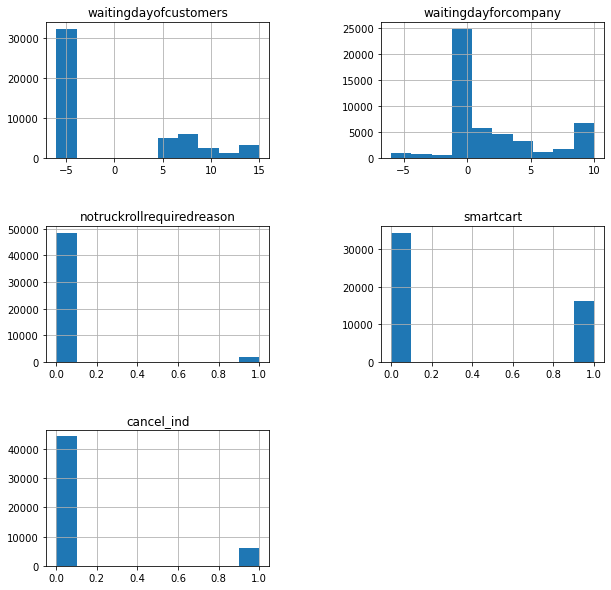

In [45]:
numeric_cols=['waitingdayofcustomers','waitingdayforcompany','notruckrollrequiredreason','smartcart','cancel_ind']
df2.hist(column=numeric_cols, figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [46]:
df2.head()

,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,order_create_date,endclientsystem,...,strOrderType,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
0,NY,REDVENT: REDVENT,FTTP_100M_100M,BREWSTER,TECH INSTALL,COMCAST,MONTHTOMONTH,A001696,2/4/18,COFEEANYWHERE,...,N,NO,0,AERIAL,SFU,N,RED VENTURES,UNKNOWN,0,0
1,MD,CSSC: CSSC,FTTP_1000M_1000M,OWEN BROWN,TECH INSTALL,COMCAST,CONTRACT,A002775,2/5/18,COA2GO,...,N,NO,0,BURIED,SFU,N,BIG BOX,1000M + TV Mundo + FDV Unlim,0,0
2,PA,ONLINE: ONLINE,FTTP_100M_100M,BRADDOCK,TECH INSTALL,COMCAST,MONTHTOMONTH,239B3PA,2/7/18,VZCOM,...,N,NO,0,AERIAL,SFU,N,ONLINE CON,UNKNOWN,1,0
3,VA,CSSC: CSSC,FTTP_1000M_1000M,DRUMMONDS CORNER,TECH INSTALL,COX COMM,CONTRACT,V660449,2/9/18,COFEEANYWHERE,...,M,NO,0,BURIED,SFU,N,CSSC,1000M + Extreme HD - 2014 + NO FDV,0,0
4,NY,ONLINE: ONLINE,FTTP_1000M_1000M,LEVITTOWN,TECH INSTALL,CABLEVISION,CONTRACT,C7962VZ,2/3/18,VZCOM,...,N,NO,0,AERIAL,SFU,N,ONLINE CON,1000M + Preferred HD 2015 + FDV Unlim,1,0


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50349 entries, 0 to 50348
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   state                      50349 non-null  category
 1   originalagency             50349 non-null  category
 2   speed                      50349 non-null  category
 3   wirecenter                 50349 non-null  category
 4   InstallType                50349 non-null  category
 5   competitorname             50349 non-null  category
 6   ContractType               50349 non-null  category
 7   salesrepid                 50349 non-null  category
 8   order_create_date          50349 non-null  category
 9   endclientsystem            50349 non-null  category
 10  hfws_ind                   50349 non-null  category
 11  due_date                   50349 non-null  category
 12  FIRSTOFFEREDDATE           50349 non-null  category
 13  waitingdayofcustomers      5034

In [48]:
df2.columns

Index(['state', 'originalagency', 'speed', 'wirecenter', 'InstallType',
       'competitorname', 'ContractType', 'salesrepid', 'order_create_date',
       'endclientsystem', 'hfws_ind', 'due_date', 'FIRSTOFFEREDDATE',
       'waitingdayofcustomers', 'waitingdayforcompany', 'BundleType',
       'ONTRequired', 'ONTInstall', 'strOrderType', 'strIsWinbackIndicator',
       'notruckrollrequiredreason', 'droptype', 'premisetype',
       'ONTselfinstallcapable', 'saleschannel', 'bundlename', 'smartcart',
       'cancel_ind'],
      dtype='object')

In [49]:
df.salesrepid.describe()

count       50383
unique       4831
top       A001696
freq         8288
Name: salesrepid, dtype: object

In [223]:
df.info()##  object  colonları  olanları   categorik  yapmadan önce

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50591 entries, 0 to 50590
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mon                        50591 non-null  object 
 1   state                      50591 non-null  object 
 2   originalagency             50591 non-null  object 
 3   speed                      50591 non-null  object 
 4   wirecenter                 50583 non-null  object 
 5   InstallType                50591 non-null  object 
 6   competitorname             50535 non-null  object 
 7   ContractType               50591 non-null  object 
 8   salesrepid                 50383 non-null  object 
 9   order_create_date          50591 non-null  object 
 10  canceldate                 6170 non-null   object 
 11  endclientsystem            50412 non-null  object 
 12  hfws_ind                   2164 non-null   object 
 13  due_date                   50359 non-null  obj

In [50]:
(df2
.assign(
        state=df2.state.astype('category'),
        originalagency=df2.originalagency.astype('category'),
        speed=df2.speed.astype('category'),
        InstallType=df2.InstallType.astype('category'),
        ContractType=df2.ContractType.astype('category'),
        order_create_date=df2.order_create_date.astype('category'),
        due_date=df2.due_date.astype('category'),
        bundlename=df2.bundlename.astype('category'),
       )
 #.info()
 .memory_usage(deep=True).sum()
)

2188581

#### NÜMERİK KOLONLARIN DAĞILIMI

array([[<AxesSubplot:title={'center':'waitingdayofcustomers'}>,
        <AxesSubplot:title={'center':'waitingdayforcompany'}>],
       [<AxesSubplot:title={'center':'notruckrollrequiredreason'}>,
        <AxesSubplot:title={'center':'cancel_ind'}>]], dtype=object)

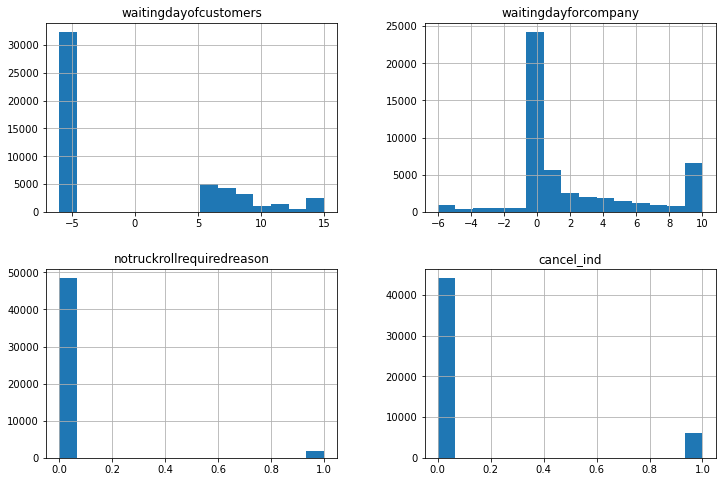

In [51]:
df2.hist(column=['waitingdayofcustomers','waitingdayforcompany','notruckrollrequiredreason','cancel_ind'], bins=15, figsize=(12,8))



##  '' cancel_ind  "  SÜTUNU   TARGET  (CHURN)   LABEL !!!  
## - STRATİFY  UYGULANMALI.. ORANTISIZ  DAĞILIMLI !!!

In [226]:
# 
df2.cancel_ind.value_counts()  # ----  STRATİFY  UYGULANMALI.. ORANTISIZ  DAĞILIMLI !!!

0    44195
1     6154
Name: cancel_ind, dtype: int64

## Label Encoding

In [52]:
df2.info()  #  veri tipleri ayarlandı !!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50349 entries, 0 to 50348
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   state                      50349 non-null  category
 1   originalagency             50349 non-null  category
 2   speed                      50349 non-null  category
 3   wirecenter                 50349 non-null  category
 4   InstallType                50349 non-null  category
 5   competitorname             50349 non-null  category
 6   ContractType               50349 non-null  category
 7   salesrepid                 50349 non-null  category
 8   order_create_date          50349 non-null  category
 9   endclientsystem            50349 non-null  category
 10  hfws_ind                   50349 non-null  category
 11  due_date                   50349 non-null  category
 12  FIRSTOFFEREDDATE           50349 non-null  category
 13  waitingdayofcustomers      5034

In [53]:
categs=['state', 'originalagency', 'speed', 'wirecenter',
       'InstallType', 'competitorname', 'ContractType', 'salesrepid',
       'order_create_date', 'endclientsystem', 'hfws_ind', 'due_date',
       'FIRSTOFFEREDDATE',
       'BundleType', 'ONTRequired', 'ONTInstall', 'strOrderType',
       'strIsWinbackIndicator', 'droptype',
       'premisetype', 'ONTselfinstallcapable', 'saleschannel', 'bundlename']
#df3=df2.copy()
#df2=pd.get_dummies(df2, columns=categs)
#df2


In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#df2[categs] = labelencoder.fit_transform(df2[categs])
#df2

for categ in categs:
    labelencoder = LabelEncoder()
    df2[categ]=labelencoder.fit_transform(df2[categ])
df2

,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,order_create_date,endclientsystem,...,strOrderType,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
0,6,20,1,74,6,2,1,172,7,2,...,1,0,0,0,3,0,16,359,0,0
1,4,6,0,477,6,2,0,238,8,1,...,1,0,0,1,3,0,0,38,0,0
2,7,15,1,69,6,2,1,19,10,10,...,1,0,0,0,3,0,12,359,1,0
3,10,6,0,175,6,3,0,3945,12,2,...,0,0,0,1,3,0,2,26,0,0
4,6,15,0,349,6,0,0,798,6,10,...,1,0,0,0,3,0,12,33,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50344,6,6,3,79,6,7,0,398,10,2,...,0,0,0,4,0,1,4,114,0,1
50345,5,6,0,384,6,2,0,1454,8,2,...,0,0,0,1,3,0,2,24,0,0
50346,4,15,19,60,6,2,1,3174,8,15,...,1,0,0,4,0,0,2,347,0,0
50347,10,6,17,176,5,3,0,4559,1,2,...,2,2,0,10,4,2,19,295,0,1


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50349 entries, 0 to 50348
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   state                      50349 non-null  int32
 1   originalagency             50349 non-null  int32
 2   speed                      50349 non-null  int32
 3   wirecenter                 50349 non-null  int32
 4   InstallType                50349 non-null  int32
 5   competitorname             50349 non-null  int32
 6   ContractType               50349 non-null  int32
 7   salesrepid                 50349 non-null  int32
 8   order_create_date          50349 non-null  int32
 9   endclientsystem            50349 non-null  int32
 10  hfws_ind                   50349 non-null  int32
 11  due_date                   50349 non-null  int32
 12  FIRSTOFFEREDDATE           50349 non-null  int32
 13  waitingdayofcustomers      50349 non-null  int8 
 14  waitingdayforcompany  

In [56]:
df2.columns

Index(['state', 'originalagency', 'speed', 'wirecenter', 'InstallType',
       'competitorname', 'ContractType', 'salesrepid', 'order_create_date',
       'endclientsystem', 'hfws_ind', 'due_date', 'FIRSTOFFEREDDATE',
       'waitingdayofcustomers', 'waitingdayforcompany', 'BundleType',
       'ONTRequired', 'ONTInstall', 'strOrderType', 'strIsWinbackIndicator',
       'notruckrollrequiredreason', 'droptype', 'premisetype',
       'ONTselfinstallcapable', 'saleschannel', 'bundlename', 'smartcart',
       'cancel_ind'],
      dtype='object')

In [57]:
df2.memory_usage(deep=True).sum()

4883981

In [58]:
#df2.to_csv('churn_kabletv3_checkk.csv')

## TARGET VECTOR  FEATURE VARİABLE 

In [59]:
X=df2.drop(columns='cancel_ind', axis=1)
y=df2['cancel_ind'].copy()


In [60]:
X1=X.copy()
y1=y.copy()

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [62]:
X_test

,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,order_create_date,endclientsystem,...,ONTInstall,strOrderType,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart
22120,5,6,17,634,6,2,1,2496,8,2,...,2,2,2,0,10,4,2,19,295,0
3150,4,20,0,466,6,2,0,172,12,2,...,0,1,0,0,1,3,0,16,0,0
28368,7,6,1,449,6,2,1,114,10,1,...,1,1,0,0,4,0,0,15,359,0
48914,5,15,17,54,6,2,0,4563,2,10,...,0,0,0,0,4,0,0,12,297,0
39614,5,20,0,421,6,2,0,172,4,2,...,1,1,0,0,4,0,0,16,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,7,21,0,339,6,2,1,404,8,14,...,1,1,0,0,1,3,0,12,35,1
7456,8,6,0,491,6,3,0,1836,10,2,...,1,0,0,0,4,0,0,2,22,0
30516,6,6,0,628,6,0,0,185,5,1,...,0,1,1,0,5,0,0,4,43,0
45281,10,6,0,214,6,3,0,4002,4,2,...,1,1,0,0,1,3,0,2,24,0


#  VERİYİ MODELLEME !

### 1 - RandomForestClassifier

In [63]:
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=23, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print('RandomForestClassifier precision_score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('recall scoree : {0:0.2f}'.format(recall_score(y_test, y_pred)))


RandomForestClassifier precision_score: 0.95
recall scoree : 0.42


### 2 - LogisticRegression

In [65]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)   
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.recall_score(y_test, y_pred))

0.25012309207287053


### 3 - KNeighborsClassifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

0.8752407318247473
0.022648941408173313


### 4 - lightgbm

In [67]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('precision_score: {0:0.3f}'.format(metrics.precision_score(y_test, y_pred)))
print('recall scoree : {0:0.3f}'.format(metrics.recall_score(y_test, y_pred)))
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))



precision_score: 0.906
recall scoree : 0.552
LightGBM Model accuracy score: 0.9383


###  Hyper parameter optimizataion for LightGBM  WİTH **GRİDSEARCHCV**!!  

In [69]:
import warnings

warnings.filterwarnings('ignore')

In [73]:
%%capture output
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

gkf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 35, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=2000, learning_rate=0.01, metric='recall')

gsearch = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='balanced_accuracy', cv=gkf, verbose=-1)
lgb_model = gsearch.fit(X_train, y_train)

print(lgb_model.best_params_, lgb_model.best_score_)

In [74]:
print(lgb_model.best_params_, lgb_model.best_score_)

{'lambda_l1': 0, 'lambda_l2': 0, 'min_data_in_leaf': 30, 'num_leaves': 127, 'reg_alpha': 0.1} 0.7711157923990897


In [ ]:
{'lambda_l1': 0, 'lambda_l2': 1, 'min_data_in_leaf': 30, 'num_leaves': 31, 'reg_alpha': 0.1} 0.9366132829879508

In [75]:
import lightgbm as lgt
#clf = lgb.LGBMClassifier()
clf3 = lgt.LGBMClassifier(is_unbalanced = True, 
                             application = 'binary', 
                             lambda_l1= 0,
                             lambda_l2= 0,
                             objective = 'binary',
                             metric ='recall',
                             num_leaves = 127,
                             #max_bin = best['max_bin'],
                             min_data_in_leaf =30,
                             reg_alpha = 0.1,
                             #min_sum_hessian_in_leaf = best['min_sum_hessian_in_leaf'],
                             #max_depth = best['max_depth'],
                             #feature_fraction = best['feature_fraction'],
                             )

In [76]:
lgb_model_final= clf3.fit(X_train, y_train)

In [77]:
preddss=lgb_model_final.predict(X_test)
# scores
print('precision_score: {0:0.3f}'.format(metrics.precision_score(y_test, preddss)))
print('recall scoree : {0:0.3f}'.format(metrics.recall_score(y_test, preddss)))
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, preddss)))

precision_score: 0.884
recall scoree : 0.561
LightGBM Model accuracy score: 0.9374


####  ---------------------  recall < 0.59 -----------------------------------

## 5 -  XGBClassifier ile deneme !!!

In [78]:

from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [79]:
# Import the XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics


# Create xgboost classifer object
xgb = XGBClassifier()

# Train XGBoost Classifer
model_xgb = xgb.fit(X_train, y_train)


#Predict the response for test dataset
y_pred_xgb = model_xgb.predict(X_test)

# scores
print('precision_score: {0:0.3f}'.format(metrics.precision_score(y_test, y_pred_xgb)))
print('recall scoree : {0:0.3f}'.format(metrics.recall_score(y_test, y_pred_xgb)))
print('XGBoost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_xgb)))


precision_score: 0.875
recall scoree : 0.571
XGBoost Model accuracy score: 0.9376


## 6 -  DecisionTreeClassifier   ile deneme !!!

In [81]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)


#Predict the response for test dataset
y_pred_tree = model.predict(X_test)

# scores
print('precision_score: {0:0.3f}'.format(metrics.precision_score(y_test, y_pred_tree)))
print('recall scoree : {0:0.3f}'.format(metrics.recall_score(y_test, y_pred_tree)))
print('DecisionTreeClassifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_tree)))


precision_score: 0.581
recall scoree : 0.638
DecisionTreeClassifier Model accuracy score: 0.8996


### Hyper parameter optimizataion for DecisionTreeClassifier  WİTH **RandomizedSearchCV**!!  

In [83]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, 25],
              "max_features": randint(1, 25),
              "min_samples_leaf": randint(1, 25),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(model, param_dist, scoring='balanced_accuracy', cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)
y_pred_trees = tree_cv.predict(X_test)

# scores
print('precision_score: {0:0.3f}'.format(metrics.precision_score(y_test, y_pred_trees)))
print('recall scoree : {0:0.3f}'.format(metrics.recall_score(y_test, y_pred_trees)))
print('Tuned Decision Tree accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_trees)))

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

precision_score: 0.697
recall scoree : 0.542
Tuned Decision Tree accuracy score: 0.9151
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 25, 'max_features': 16, 'min_samples_leaf': 7}
Best score is 0.764624707397998


##  DAHA İLERİ   HYPER  PARAMETER  TUNİNG   !!!
###  GÖRÜLECEĞİ GİBİ    RECALL  VALUE  VE DİĞER  METRİCLERDE   EN YÜKSEK  OLAN: XGBOOST   VE  LİGHTGBM  VAR !!;
### 1-   **XGBOOST** İLE  İLERİ HYPER  PARAMETER  TUNİNG  (RECALL=0.57)   !!!  


In [84]:
  ###   RECALL DEĞERİ VE AYNI  ZAMANDA PRECİSİON VE  ACCURACY  DEĞERLERİ  GÖZETİLDİĞİNDE EN  YÜKSEK SCORLAR
      ###     XGBOOST VE  LİGHTGBM  DE VAR..

In [90]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_validate

Scoring_type={'recall_score':metrics.make_scorer(metrics.recall_score),
             'precision_score':metrics.make_scorer(metrics.precision_score),
             'accuracy_score':metrics.make_scorer(metrics.accuracy_score),
             'metrics.roc_auc_score':metrics.make_scorer(metrics.roc_auc_score),
             'metrics.f1_score': metrics.make_scorer(metrics.f1_score)}

In [93]:
%%time

from copy import deepcopy
from xgboost import XGBClassifier 

#dictionary for collecting results
results_dict = {}

#obtaining default parameters by calling .fit() to XGBoost model instance
xgbc0 = XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric=metrics.recall_score,
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)
xgbc0.fit(X_train , y_train)

#extracting default parameters from benchmark model
default_params = {}
gparams = xgbc0.get_params()

#default parameters have to be wrapped in lists - even single values - so GridSearchCV can take them as inputs
for key in gparams.keys():
    gp = gparams[key]
    default_params[key] = [gp]

#benchmark model. Grid search is not performed, since only single values are provided as parameter grid.
#However, cross-validation is still executed
clf0 = GridSearchCV(estimator=xgbc0, scoring='recall', param_grid=default_params, return_train_score=True, verbose=1, cv=3)
clf0.fit(X_train, y_train.values.ravel())

#results dataframe
df = pd.DataFrame(clf0.cv_results_)

#predictions - inputs to confusion matrix
train_predictions = clf0.predict(X_train)
test_predictions = clf0.predict(X_test)

#confusion matrices
cfm_train = confusion_matrix(y_train, train_predictions)
cfm_test = confusion_matrix(y_test, test_predictions)


#accuracy scores
accs_train = accuracy_score(y_train, train_predictions)
accs_test = accuracy_score(y_test, test_predictions)


#F1 scores for each train/test label
f1s_train_p1 = metrics.f1_score(y_train, train_predictions, pos_label=1)
f1s_train_p0 = metrics.f1_score(y_train, train_predictions, pos_label=0)
f1s_test_p1 = metrics.f1_score(y_test, test_predictions, pos_label=1)
f1s_test_p0 = metrics.f1_score(y_test, test_predictions, pos_label=0)

#Area Under the Receiver Operating Characteristic Curve
test_ras = roc_auc_score(y_test, clf0.predict_proba(X_test)[:,1])

#best parameters
bp = clf0.best_params_

#storing computed values in results dictionary
results_dict['xgbc0'] = {'iterable_parameter': np.nan,
                         'classifier': deepcopy(clf0),
                         'cv_results': df.copy(),
                         'cfm_train': cfm_train,
                         'cfm_test': cfm_test,
                         'train_accuracy': accs_train,
                         'test_accuracy': accs_test,
                         'train F1-score label 1': f1s_train_p1,
                         'train F1-score label 0': f1s_train_p0,
                         'test F1-score label 1': f1s_test_p1,
                         'test F1-score label 0': f1s_test_p0,
                         'test roc auc score': test_ras,
                         'best_params': bp}


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Wall time: 2.81 s


In [94]:
#creating deepcopy of default parameters before manipulations
params = deepcopy(default_params)

#setting grid of selected parameters for iteration
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.1,1.3,1.6,2.4,3.2,6.4,12.8,14,17,25.6,51.2,102.4,150, 200],
              'learning_rate': [0.01,0.02,0.03,0.4,0.5,0.6, 0.06,0.7,0.9,0.1, 0.15, 0.2, 0.25, 0.300000012,0.06],
              'max_depth': [5,6,7,8,9,10,11,12,13,14,17,31],
              'n_estimators': [90,100,115,120,130,150,200,260],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [98]:
import time
#start time
t0 = time.time()
#No. of jobs
gcvj = np.cumsum([len(x) for x in param_grid.values()])[-1]

#iteration loop. Each selected parameter iterated separately
for i,grid_key in enumerate(param_grid.keys()):
    
    #variable for measuring iteration time
    loop_start = time.time()
       
    #creating param_grid argument for GridSearchCV:
    #listing grid values of current iterable parameter and wrapping non-iterable parameter single values in list
    for param_key in params.keys():
        if param_key == grid_key:
            params[param_key] = param_grid[grid_key]
        else:
            #use best parameters of last iteration
            try:
                param_value = [clf.best_params_[param_key]]
                params[param_key] = param_value
            #use benchmark model parameters for first iteration
            except:
                param_value = [clf0.best_params_[param_key]]
                params[param_key] = param_value
    
    #classifier instance of current iteration
    xgbc = XGBClassifier(**default_params)
    
    #GridSearch instance of current iteration
    clf = GridSearchCV(estimator=xgbc, param_grid=params, scoring='recall', return_train_score=True, verbose=1, cv=3)
    clf.fit(X_train, y_train.values.ravel())
    
    #results dataframe
    df = pd.DataFrame(clf.cv_results_)
    
    #predictions - inputs to confusion matrix
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
    
    #confusion matrices
    cfm_train = confusion_matrix(y_train, train_predictions)
    cfm_test = confusion_matrix(y_test, test_predictions)
    
    #accuracy scores
    accs_train = accuracy_score(y_train, train_predictions)
    accs_test = accuracy_score(y_test, test_predictions)
    
    #F1 scores for each train/test label
    f1s_train_p1 = metrics.f1_score(y_train, train_predictions, pos_label=1)
    f1s_train_p0 = metrics.f1_score(y_train, train_predictions, pos_label=0)
    f1s_test_p1 = metrics.f1_score(y_test, test_predictions, pos_label=1)
    f1s_test_p0 = metrics.f1_score(y_test, test_predictions, pos_label=0)
    
    #Area Under the Receiver Operating Characteristic Curve
    test_ras = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
    
    #best parameters
    bp = clf.best_params_
    
    #storing computed values in results dictionary
    results_dict[f'xgbc{i+1}'] = {'iterable_parameter': grid_key,
                                  'classifier': deepcopy(clf),
                                  'cv_results': df.copy(),
                                  'cfm_train': cfm_train,
                                  'cfm_test': cfm_test,
                                  'train_accuracy': accs_train,
                                  'test_accuracy': accs_test,
                                  'train F1-score label 1': f1s_train_p1,
                                  'train F1-score label 0': f1s_train_p0,
                                  'test F1-score label 1': f1s_test_p1,
                                  'test F1-score label 0': f1s_test_p0,
                                  'test roc auc score': test_ras,
                                  'best_params': bp}
    
    #variable for measuring iteration time
    elapsed_time = time.time() - loop_start
    print(f'iteration #{i+1} finished in: {elapsed_time} seconds')

#stop time
t1 = time.time()

#elapsed time
gcvt = t1 - t0

Fitting 3 folds for each of 19 candidates, totalling 57 fits
iteration #1 finished in: 17.464234113693237 seconds
Fitting 3 folds for each of 15 candidates, totalling 45 fits
iteration #2 finished in: 19.675740242004395 seconds
Fitting 3 folds for each of 12 candidates, totalling 36 fits
iteration #3 finished in: 18.04446053504944 seconds
Fitting 3 folds for each of 8 candidates, totalling 24 fits
iteration #4 finished in: 12.21394658088684 seconds
Fitting 3 folds for each of 13 candidates, totalling 39 fits
iteration #5 finished in: 16.765605688095093 seconds
Fitting 3 folds for each of 13 candidates, totalling 39 fits
iteration #6 finished in: 22.520103216171265 seconds


In [99]:
bp

{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 'gamma': 0.1,
 'gpu_id': -1,
 'grow_policy': 'lossguide',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.7,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 5,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 150,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 0,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'hist',
 'use_label_encoder': False,
 'validate_paramet

###  TUNE EDİLMİŞ   XGBOOST  İLE  **CROSS-VALİDATİON** !!  

In [104]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_validate


xgb_tuned_clf = XGBClassifier(**bp)


Scoring_type={'recall_score':metrics.make_scorer(metrics.recall_score),
             'precision_score':metrics.make_scorer(metrics.precision_score),
             'accuracy_score':metrics.make_scorer(metrics.accuracy_score),
             'metrics.roc_auc_score':metrics.make_scorer(metrics.roc_auc_score),
             'metrics.f1_score': metrics.make_scorer(metrics.f1_score)}
cv=KFold(n_splits=10)
cv_results=cross_validate(xgb_tuned_clf, X, y, n_jobs=-1,
                         return_train_score=False, cv=cv, scoring=Scoring_type,
                         verbose=True,return_estimator=False)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.0s finished


In [101]:
cv_results

{'fit_time': array([1.17767096, 1.12729502, 1.18948984, 1.10904717, 1.08817172,
        1.06001949, 1.06038451, 1.09060001, 1.08049011, 1.13884616]),
 'score_time': array([0.09051466, 0.04026747, 0.04023457, 0.03818488, 0.0321207 ,
        0.04018331, 0.0402782 , 0.04019046, 0.04023266, 0.03213835]),
 'test_recall_score': array([0.61858974, 0.57188498, 0.57721139, 0.56402439, 0.57857143,
        0.58265139, 0.55633803, 0.60350877, 0.58692185, 0.59534884]),
 'test_precision_score': array([0.71217712, 0.78681319, 0.78732106, 0.78059072, 0.72808989,
        0.75744681, 0.75779376, 0.75438596, 0.78969957, 0.79503106]),
 'test_accuracy_score': array([0.92174777, 0.92750745, 0.92333664, 0.9225422 , 0.92909633,
        0.92671301, 0.92989076, 0.93286991, 0.92909633, 0.92848629]),
 'test_metrics.roc_auc_score': array([0.79161181, 0.77494227, 0.77670094, 0.77013734, 0.77576616,
        0.77844143, 0.76686389, 0.78921239, 0.78234477, 0.78639622]),
 'test_metrics.f1_score': array([0.66209262, 0.6

In [105]:
dfcv_result=pd.DataFrame(cv_results) #testsize=0.3 ve  stratified,   XGBOOOSTT İLE
dfcv_result=dfcv_result*100
dfcv_result.describe()

,fit_time,score_time,test_recall_score,test_precision_score,test_accuracy_score,test_metrics.roc_auc_score,test_metrics.f1_score
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,95.804293,3.485334,56.737740,75.518679,92.461381,77.088565,64.772807
std,16.631891,0.733100,2.176212,1.322501,0.500070,1.085439,1.616784
min,79.844546,2.674961,52.028640,72.843450,91.967991,74.829887,61.669024
25%,83.215296,3.016335,55.610267,74.900955,92.143492,76.521740,63.759800
50%,89.342952,3.071272,57.284515,75.689168,92.307694,77.274998,65.078254
75%,101.342177,3.982818,58.095987,76.262174,92.499259,77.742301,65.643846
max,125.280762,5.028796,59.640103,77.591973,93.360996,78.697773,67.441860


#### !! ( MEAN ) **RECALL  DEĞERİ 58.350**  KULLANILAN MODELİN  FAZLA GERİSİNDE (**59.24**)!  DİĞER  PARAMETRELERDE BENZER SEVİYERLERDE!!
####  -- ---------------------------  **İLERLEME OLMADI** ---------------------------

## İLERİ  HYPER  PARAMETER  TUNİNG   !!!
###  2. Cİ  ADAY MODEL  OLARAK   RECALL  VALUE ORTALAMANIN ÜSTÜNDE OLAN :
### **LİGHTGBM** SEÇİLDİ (0.55)   !!!  


####  ----------------- **OPTUNA** KULLANICAZ   :
#### Optuna; hem makine öğrenimi hem de derin öğrenme algoritmaları 
#### ile uyumlu çalışabilen, etkinliği ve hızı kanıtlanmış açık kaynak kodlu optimizasyon algoritmalarından biridir.

In [106]:
import optuna  # pip install optuna
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score, precision_recall_curve

from sklearn.model_selection import StratifiedKFold
import lightgbm as lgbm

def objective(trial, X, y):
    param_grid = {}  # to be filled in later
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgbm.LGBMClassifier(objective="binary", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="recall_score",
            early_stopping_rounds=100,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = preds

    return np.mean(cv_scores)

In [107]:
def objective(trial, X, y):
    param_grid = {
        #         "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 1, step=0.05),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 6, 23),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 10000, step=50),
        "max_bin": trial.suggest_int("max_bin", 200, 300),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }

In [108]:
from optuna.integration import LightGBMPruningCallback
from sklearn.model_selection import StratifiedKFold
def objective(trial, X, y):
    param_grid = {
        #         "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 1, step=0.05),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 6, 23),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 10000, step=50),
        "max_bin": trial.suggest_int("max_bin", 200, 300),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgbm.LGBMClassifier(objective="binary", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="binary_logloss",
            early_stopping_rounds=10,
              # Add a pruning callback
        )
        preds = model.predict(X_test)
        cv_scores[idx] = metrics.recall_score(y_test, preds)
        
        #cv_scores[idx] = metrics.recall_score(y_test, preds)
        #acc = metrics.accuracy_score(preds, y_test)
        ##recall = metrics.recall_score(preds, y_test)
        #precision = metrics.precision_score(preds, y_test)
        #f1 = metrics.f1_score(preds, y_test)

   
    return np.mean(cv_scores) #,acc, f1, recall, precision

In [ ]:
%%capture --no-display
#%%capture output
#%%capture --no-stderr

study = optuna.create_study(direction="maximize", study_name="LGBdM Classifier")
func = lambda trial: objective(trial, X, y)
study.optimize(func, n_trials=1000)

In [116]:
param2={'n_estimators': 10000, 'learning_rate': 0.96, 'num_leaves': 2640, 'max_depth': 19, 'min_data_in_leaf': 300, 'max_bin': 241, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 1.0735305124331032, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.4}

model2 = lgbm.LGBMClassifier(objective="binary", **param2)
model2.fit(X_train,y_train)
y_pred1=model2.predict(X_test)
print(metrics.recall_score(y_test,y_pred1))

0.5942885278188085


## TEST  DATASINDA  EN  YÜKSEK RECALL DEĞERİNE ULAŞILDI !!  ( 0.594 )!!

### CROSS-VALİDATİON  FOR LİGHTGBM

In [117]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_validate

Scoring_type={'recall_score':metrics.make_scorer(metrics.recall_score),
             'precision_score':metrics.make_scorer(metrics.precision_score),
             'accuracy_score':metrics.make_scorer(metrics.accuracy_score),
             'metrics.roc_auc_score':metrics.make_scorer(metrics.roc_auc_score),
             'metrics.f1_score': metrics.make_scorer(metrics.f1_score)}
cv=KFold(n_splits=10)
cv_results=cross_validate(model2, X, y, n_jobs=-1,
                         return_train_score=False, cv=cv, scoring=Scoring_type,
                         verbose=True,return_estimator=False)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  8.4min finished


In [118]:
dfcv_result=pd.DataFrame(cv_results) #testsize=0.3 ve  stratified,  lighgb ile
dfcv_result=dfcv_result*100
dfcv_result.describe()

,fit_time,score_time,test_recall_score,test_precision_score,test_accuracy_score,test_metrics.roc_auc_score,test_metrics.f1_score
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,9405.709000,573.596189,58.972461,72.469130,92.240152,77.920469,64.975830
std,1461.342655,31.369460,1.772500,3.309843,0.425498,0.797952,1.575753
min,7619.433594,504.094458,54.753521,65.600000,91.676599,76.279827,61.886792
25%,8025.270510,577.975017,58.316638,71.029524,92.000993,77.459964,64.082180
50%,9324.744248,582.082319,59.222598,71.518044,92.095333,78.007283,65.229002
75%,10802.054077,585.264647,60.066112,75.568965,92.571996,78.478316,65.647697
max,11177.252555,604.544687,60.925040,76.039120,92.949355,79.067329,67.491166


In [102]:
##### !! ( MEAN )RECALL  DEĞERİ **58.972**  KULLANILAN MODELE ÇOK YAKIN (59.24)!!  DİĞER  PARAMETRELERDE İSE DAHA BAŞARILI!!
####  -- ---------------------------  **İLERLEME SAĞLANMIŞTIR** ---------------------------

In [119]:
models = {'USED_MODEL': [92.16, 71.62, 59.24, 64.84], 'NEW_MODEL': [92.24, 72.46, 58.97, 64.97]}
df_plot=pd.DataFrame(data=models, index=['Accuracy(%)', 'Precision(%)', 'Recall(%)', 'F1(%)'])
#_plot=pd.DataFrame(data=models, index=['Accuracy(%)', 'Precision(%)', 'Recall(%)', 'F1(%)']).T.plot.line(figsize=(12,8))
                                                                                    

In [120]:
df_plot # KARŞILAŞTIRMAA!

,USED_MODEL,NEW_MODEL
Accuracy(%),92.16,92.24
Precision(%),71.62,72.46
Recall(%),59.24,58.97
F1(%),64.84,64.97


<AxesSubplot: title={'center': 'MODELS &  METRİCS'}>

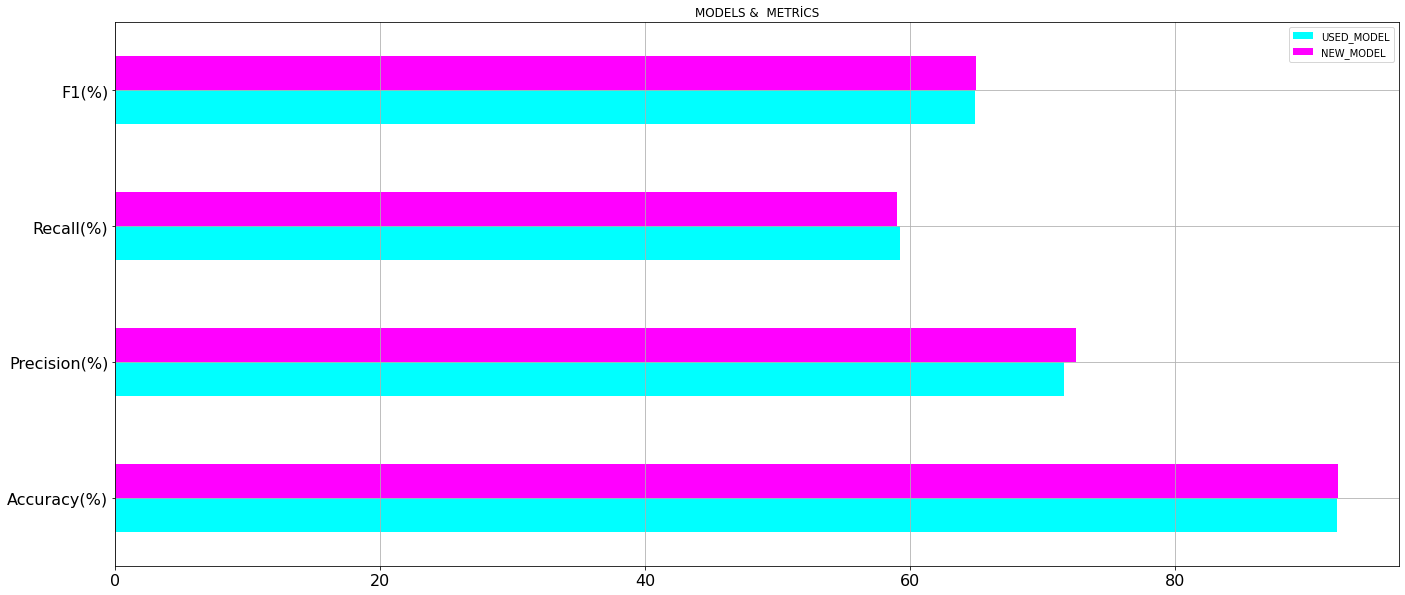

In [223]:
df_plot.plot(kind='barh',figsize=(23,10), colormap='cool',fontsize=16, grid=True, sort_columns=True,
            title='MODELS &  METRİCS')

###  SONUÇ  OLARAK YENİ  OLUŞTURULAN MODELİN  RECALL DEĞERİ ÇOK AZ FARKLA  DÜŞÜK  İKEN ( 59,24 VS. 58.972 ) DİĞER METRİCLERDE İSE BUNA  ORANLA GRAFİKTEKİ GİBİ  DAHA FAZLA   İYİLEŞTİRİLME  SAĞLANMIŞTIR !! (**~%1**)

### MODELİN SON KULLANIM İÇİN KAYIT EDİLMESİ !!!!

In [121]:
import joblib
joblib.dump(model2, 'TUNED__CABLETV_CHURN_MODEL')

['TUNED__CABLETV_CHURN_MODEL']

####  ÖRNEK ÇEKEREK MODELİN  KONTROLÜ !!

In [122]:
cableTv_churn_model=joblib.load('TUNED__CABLETV_CHURN_MODEL')

Modelimiz joblib'den çağrılabiliyor mu bakalım.

In [123]:
## şimdi tahmin yapalım !!
cableTv_churn_model.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=int8)